In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

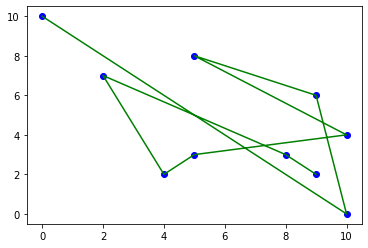

In [2]:
x=[0, 10, 9, 5, 10, 5, 4, 2, 8, 9]
y=[10, 0, 6, 8, 4, 3, 2, 7, 3, 2]
plt.plot(x,y,'o',color='blue')
plt.plot(x,y,'-',color='green')

In [3]:
def dist(x,y): 
    z=0
    for i in range(9):
        z+=np.sqrt((x[i+1]-x[i])**2+(y[i+1]-y[i])**2)
    return z
dist(x,y) # 초기 배열된 (x,y) 순서대로(위의 그래프) 구했을 경우 경로 거리

51.623872342863045

28.91508656817657

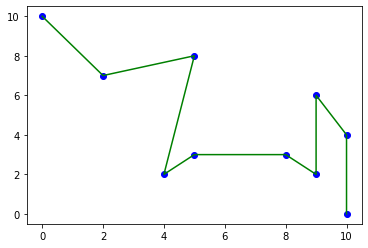

In [4]:
# 과제에 나와 있는 그래프대로(점 하나 복구) 그린 후 거리 구해봄. 최단거리면 이 거리 이하로 나와야 함.
x1=[0,2,5,4,5,8,9,9,10,10]
y1=[10,7,8,2,3,3,2,6,4,0]
plt.plot(x1,y1,'o',color='blue')
plt.plot(x1,y1,'-',color='green')
dist(x1,y1)

In [5]:
def de(i,j,x,y): 
    nx, ny = x[:], y[:]
    nx[i], nx[j] = nx[j], nx[i]
    ny[i], ny[j] = ny[j], ny[i]
    return dist(nx,ny)-dist(x,y)

In [6]:
def swap(x,y,b): # 순서 바꾸기를 에너지 처럼 E<0 일 때는 무조건 바뀌고, E>0 일 때는 exp(-b*delta) 확률로 순서 바뀌게 설정
    i=random.randint(0,9)
    j=random.randint(0,9)
    delta=de(i,j,x,y)
    if(delta<0):
        x[i], x[j] = x[j], x[i]
        y[i], y[j] = y[j], y[i]
    elif(random.random()<np.exp(-b*delta)):
            x[i], x[j] = x[j], x[i]
            y[i], y[j] = y[j], y[i]
    return x,y

In [47]:
def mini(N,b):
    n, r, L = 0, [],[([0, 10, 9, 5, 10, 5, 4, 2, 8, 9],[10, 0, 6, 8, 4, 3, 2, 7, 3, 2])] # 초기 위치를 L에 넣었음.
    while (n<N): # N회 반복
        x,y = [0, 10, 9, 5, 10, 5, 4, 2, 8, 9],[10, 0, 6, 8, 4, 3, 2, 7, 3, 2]
        sp = swap(x,y,b) # 경로 순서 바꾸기 
        L.append(sp)
        d = dist(x,y) # 바꾼 순서로 거리 구하기
        r.append(d)
        n += 1 # 1회 완료
    return r.index(min(r)), L, r

In [94]:
mt = mini(10,0.001)
indext = mi[0] # r(거리) 에서 최솟값의 index
Lt = mi[1] # L은 초기 좌표 때문에
rt = mi[2] 
indext, Lt, rt

(4,
 [([0, 10, 9, 5, 10, 5, 4, 2, 8, 9], [10, 0, 6, 8, 4, 3, 2, 7, 3, 2]),
  ([0, 10, 9, 9, 10, 5, 4, 2, 8, 5], [10, 0, 6, 2, 4, 3, 2, 7, 3, 8]),
  ([0, 10, 9, 5, 9, 5, 4, 2, 8, 10], [10, 0, 6, 8, 2, 3, 2, 7, 3, 4]),
  ([0, 10, 9, 5, 4, 5, 10, 2, 8, 9], [10, 0, 6, 8, 2, 3, 4, 7, 3, 2]),
  ([0, 10, 9, 5, 10, 5, 4, 2, 9, 8], [10, 0, 6, 8, 4, 3, 2, 7, 2, 3]),
  ([0, 9, 9, 5, 10, 5, 4, 2, 8, 10], [10, 2, 6, 8, 4, 3, 2, 7, 3, 0]),
  ([0, 10, 9, 5, 10, 5, 4, 2, 8, 9], [10, 0, 6, 8, 4, 3, 2, 7, 3, 2]),
  ([0, 10, 9, 5, 10, 5, 8, 2, 4, 9], [10, 0, 6, 8, 4, 3, 3, 7, 2, 2]),
  ([0, 10, 9, 5, 10, 5, 4, 2, 8, 9], [10, 0, 6, 8, 4, 3, 2, 7, 3, 2]),
  ([0, 10, 9, 5, 10, 5, 4, 2, 9, 8], [10, 0, 6, 8, 4, 3, 2, 7, 2, 3]),
  ([5, 10, 9, 5, 10, 0, 4, 2, 8, 9], [3, 0, 6, 8, 4, 10, 2, 7, 3, 2])],
 [51.40141846040261,
  52.27779118350975,
  54.462349573911446,
  53.01509505897769,
  49.63190648071706,
  51.623872342863045,
  56.79544521811686,
  51.623872342863045,
  53.01509505897769,
  57.40563123770128])

In [106]:
a = Lt[indext+1][0] # 초기 조건 (x,y) 가 L에 들어가서 시작하므로, index + 1 을 해야지 min(r) 에 대응되는 (x,y)가 나옴.
b = Lt[indext+1][1]
dist(a,b)==min(rt)

True

39.40943251390161

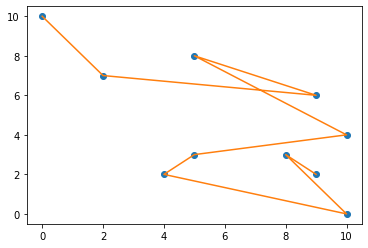

In [128]:
M = mini(20000,0)
index = M[0]
L = M[1]
r = M[2]
X, Y = L[index+1][0], L[index+1][1]
plt.plot(X,Y,'o')
plt.plot(X,Y,'-')
dist(X,Y)

simulated annealing 은 이해를 못한건지 작동을 하지 않아서 못했습니다.